![uwm_logo1_pl.svg](https://uwm.edu.pl/sites/default/files/2023-01/uwm_logo_poziome_PL.png)

# Symulacje komputerowe
## Laboratorium 05 - Modele fizyczne
**mgr inż. Adam Zalewski**<br>
na podstawie materiałów **dra inż. Mariusza Bodziocha**

**Zadanie 0.** Zaimportuj niezbędne biblioteki.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Podstawowe pojęcia fizyczne
1. Położenie, prędkość, przyspieszenie
    - Położenie ($r$) – wielkość fizyczna określająca umiejscowienie danego ciała w przestrzeni względem wybranego układu współrzędnych
    - Prędkość ($v$) - wielkość fizyczna opisująca szybkość zmiany położenia ciała względem układu odniesienia.
      $$v=\frac{dr}{dt}=\dot{r}$$
    - Przyspieszenie ($a$) – wektorowa wielkość fizyczna wyrażająca zmianę wektora prędkości w czasie
      $$a=\frac{dv}{dt}=\dot{v} = \ddot{r}$$

2. II zasada dynamiki Newton'a
    - W inercjalnym układzie odniesienia jeśli siły działające na ciało nie równoważą się (czyli wypadkowa sił $F_{w}$ jest różna od zera), to ciało porusza się z przyspieszeniem wprost proporcjonalnym do siły wypadkowej, a odwrotnie proporcjonalnym do masy ciała.
      $$F_w = ma = m\dot{v} = m\ddot{r}$$

3. Prawo Hooke'a
    - Prawo Hooke’a – prawo mechaniki określające zależność odkształcenia od naprężenia. Głosi ono, że odkształcenie ciała pod wpływem działającej na nie siły jest proporcjonalne do tej siły. Stosunek naprężenia wywołanego przyłożeniem siły do powstałego odkształcenia ($\Delta l$), jest nazywany współczynnikiem (modułem) sprężystości ($k$).
      $$F = k\Delta l$$

4. Tłumienie
    - Tłumienie (gaśnięcie) drgań – zmniejszanie się amplitudy drgań układu drgającego wraz z upływem czasu, spowodowane stratami energii[1]. Tłumienie drgań obserwowane jest zarówno w układach mechanicznych jak elektrycznych.
      $$F=-b\frac{dr}{dt} = -b\dot{r} = -bv$$

### Układ masa - sprężyna

Model fizyczny przedstawiony jest na poniższym rysunku.

![image.png](attachment:f4a3b62f-fb27-4e34-b7b9-8b071678b2bb.png)

Przyjmijmy uproszczone założenia:
- brak oporu środowiska
- ruch wzdłuż osi x; brak obrotów i ruchu w innych kierunkach.
- sprężyny idealne, liniowe (prawo Hooke’a)
- sztywności $k_1$, $k_2$ stałe, niezależne od amplitudy/prędkości/temperatury
- masa sprężyn pomijalna
- podstawa/ściana sztywna i nieruchoma

Oznaczmy $x_1(t)$ oraz $x_2(t)$ jako odpowiednio przesunięcia mas $m_1$ oraz $m_2$ w prawo w czasie $t$.

Wydłużenia sprężyn:
- $\delta_{k_1} = x_1$
- $\delta_{k_2} = x_2 - x_1$

Siły działające na masy:
- $F_{m_1} = -k_1x_1 + k_2(x_2-x_1)$
- $F_{m_2} = -k_2(x_2-x_1)$

Zgodnie z II zasadą dynamiki Newton'a:
- $m_1\ddot{x}_1 = -k_1x_1 + k_2(x_2-x_1)$
- $m_2\ddot{x}_2 = -k_2(x_2-x_1)$

Dzieląc odpowiednio przez $m_1$ oraz $m_2$ otrzymujemy:
- $\ddot{x}_1 = \frac{1}{m_1}\left[-k_1x_1 + k_2(x_2-x_1)\right]$
- $\ddot{x}_2 = \frac{1}{m_2}\left[-k_2(x_2-x_1)\right]$

**Zadanie 1.** Zaimplementuj funkcję <code>def zadanie_1(t, state, m1, m2, k1, k2)</code>, która zwraca tablicę obliczonych pochodnych.

In [9]:
def zadanie_1(t, state, m1, m2, k1, k2):
  x1, x2, v1, v2 = state
  a1 = (-k1 * x1 + k2 * (x2 - x1)) / m1
  a2 = (-k2 * (x2 - x1)) / m2
  return [v1, v2, a1, a2]

**Zadanie 2.** Przyjmujemy następujące dane układu:
- $m_1 = m_2 = 50 kg$,
- $k_1=200 \frac{N}{m}$,
- $k_2=400 \frac{N}{m}$,

Gdzie wyróżniamy warunki początkowe:
- $x_1=x_2=0$,
- $\dot{x}_1 = 1$,
- $\dot{x}_2 = 0$.

Dla $t\in[0,10]$ oraz dla podanych danych rozwiązać układ równań.

In [10]:
t_span = (0, 10)
t_eval = np.linspace(*t_span, 100000)

m1 = 50
m2 = 50
k1 = 200
k2 = 400
zad1 = solve_ivp(zadanie_1, t_span, [0,0,1,0], args = (m1, m2, k1, k2), t_eval = t_eval)

**Zadanie 3.** Na podstawie rozwiązanego układu równań wygenerować następujące wykresy:

**a)** Wykresy położenia na jednym wykresie.

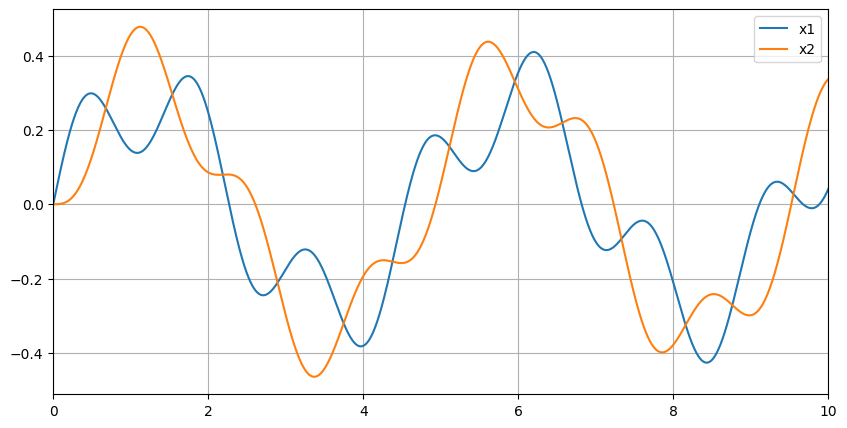

In [11]:
plt.figure(figsize = (10, 5))
plt.plot(zad1.t, zad1.y[0], label = "x1")
plt.plot(zad1.t, zad1.y[1], label = "x2")

plt.xlim(*t_span)

plt.legend()
plt.grid()
plt.show()

**b)** Wykresy prędkości na jednym wykresie.

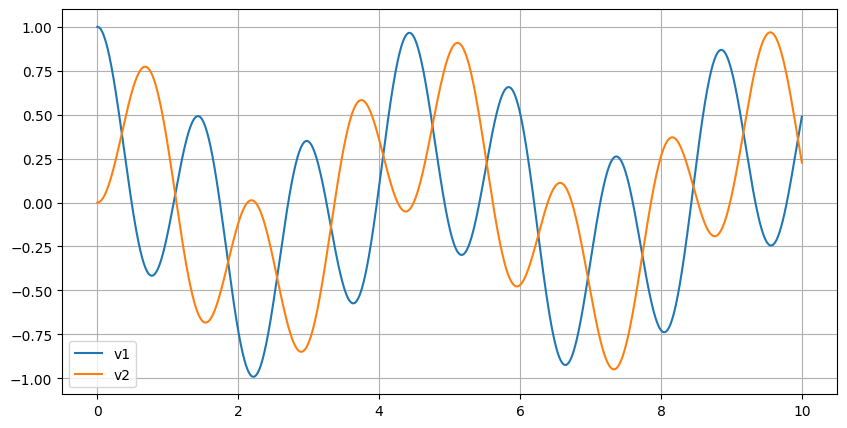

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(zad1.t, zad1.y[2], label = "v1")
plt.plot(zad1.t, zad1.y[3], label = "v2")


plt.legend()
plt.grid()
plt.show()

**c)** Portrety fazowe położenia oraz predkosci na dwóch oddzielnych wykresach.

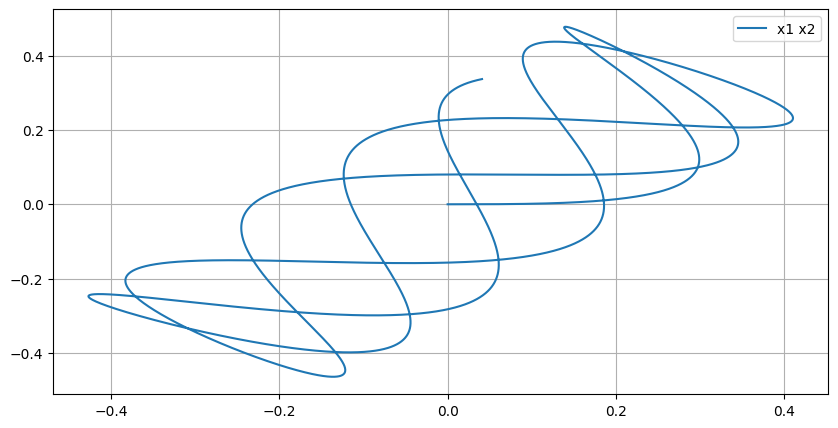

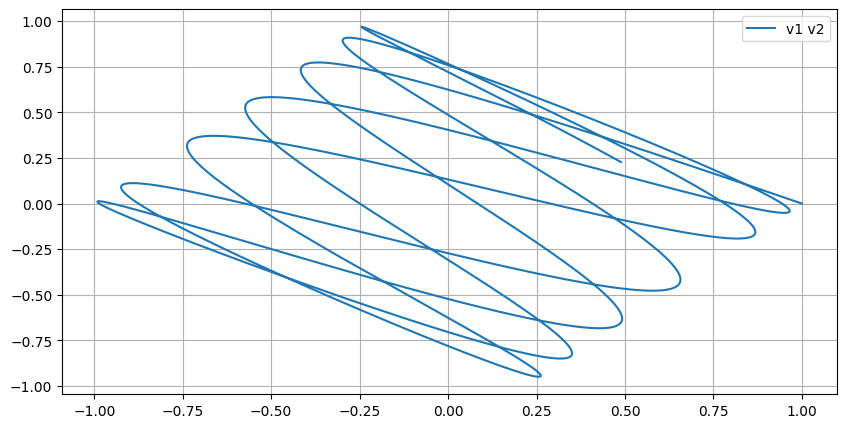

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(zad1.y[0], zad1.y[1], label = "x1 x2")



plt.legend()
plt.grid()
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(zad1.y[2], zad1.y[3], label = "v1 v2")



plt.legend()
plt.grid()
plt.show()

**d)** Wykresy energii kinetycznej dla każdej masy oraz całego układu na dwóch oddzielnych wykresach.

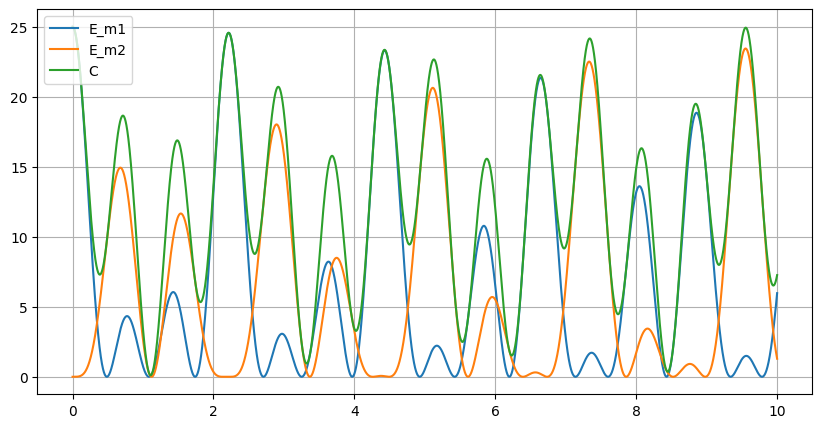

In [16]:
E_m1 = 0.5 * m1 * zad1.y[2] ** 2
E_m2 = 0.5 * m2 * zad1.y[3] ** 2

C = E_m1 + E_m2

plt.figure(figsize= (10, 5))
plt.plot(zad1.t, E_m1, label = "E_m1")
plt.plot(zad1.t, E_m2, label = "E_m2")
plt.plot(zad1.t, C, label = "C")

plt.grid()
plt.legend()
plt.show()

**e)** Wykresy położenia, prędkości oraz przyspieszenia dla każdej masy na dwóch oddzielnych wykresach.

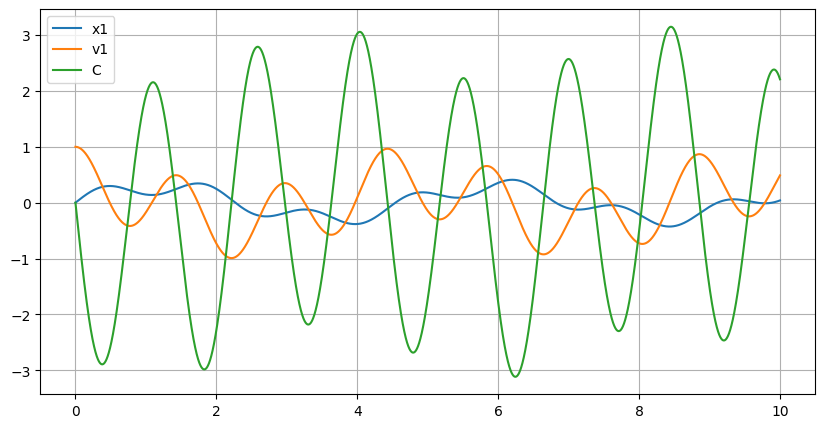

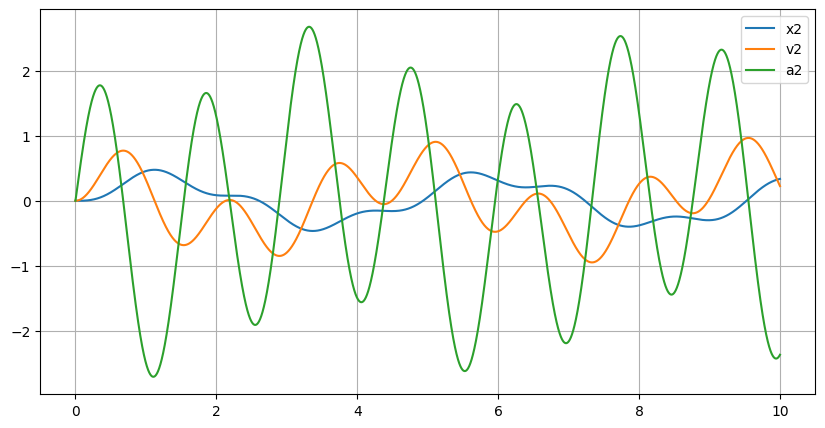

In [18]:
a1 = (-k1 * zad1.y[0] + k2 * (zad1.y[1] - zad1.y[0])) / m1
a2 = (-k2 * (zad1.y[1] - zad1.y[0])) / m2

plt.figure(figsize= (10, 5))
plt.plot(zad1.t, zad1.y[0], label = "x1")
plt.plot(zad1.t, zad1.y[2], label = "v1")
plt.plot(zad1.t, a1, label = "C")

plt.grid()
plt.legend()
plt.show()

plt.figure(figsize= (10, 5))
plt.plot(zad1.t, zad1.y[1], label = "x2")
plt.plot(zad1.t, zad1.y[3], label = "v2")
plt.plot(zad1.t, a2, label = "a2")

plt.grid()
plt.legend()
plt.show()

### Układ masa - sprężyna - tłumik

Model fizyczny przedstawiony jest na poniższym rysunku.

![image.png](attachment:3612d80a-2e47-4814-8bfa-fbf6076029ff.png)

Przyjmijmy uproszczone założenia:
- brak oporu środowiska
- ruch wzdłuż osi x; brak obrotów i ruchu w innych kierunkach.
- sprężyny idealne, liniowe (prawo Hooke’a)
- sztywności $k$ stałe, niezależne od amplitudy/prędkości/temperatury
- masa sprężyn pomijalna
- podstawa/ściana sztywna i nieruchoma

Oznaczmy $x(t)$ jako przesunięcie masy $m$ w prawo w czasie $t$.

Wydłużenia sprężyn:
- $\delta_k = x$

Siła tłumiąca:
- $F_t = -b\dot{x}$

Siły działające na masę:
- $F_m =-2kx -b\dot{v}$

Zgodnie z II zasadą dynamiki Newton'a:
- $m\ddot{x} = -2kx -b\dot{v}$

Dzieląc odpowiednio przez $m$ otrzymujemy:
- $\ddot{x} = \frac{1}{m}\left[-2kx -b\dot{v}\right]$

**Zadanie 4.** Zaimplementuj funkcję <code>def zadanie_4(t, state, m, k, b)</code>, która zwraca tablicę obliczonych pochodnych.

In [19]:
def zadanie_4(t, state, m, k, b):
  x, v = state
  a = (-2 * k * x - b * v ) / m
  return [v, a]

**Zadanie 5.** Przyjmujemy następujące dane układu:
- $m = 20 kg$,
- $k=400 \frac{N}{m}$,
- $b=25 \frac{Ns}{m}$.

Gdzie wyróżniamy warunki początkowe:
- $x=0$,
- $\dot{x} = 0.1$.

Dla $t\in[0,8]$ oraz dla podanych danych rozwiązać układ równań.

**Zadanie 6.** Na podstawie rozwiązanego układu równań wygenerować następujące wykresy:

**a)** Wykres położenia, prędkości oraz przyspieszenia na jednym wykresie.

**b)** Wykres energii kinetycznej całego układu.

**c)** Wykres wychylenia maksymalnego w zależności od współczynnika tłumienia $b\in[1,350]$.

**Zadanie 7.** Napisać funkcję <code>def find_b(x_max, diff, **kwargs):</code>, która dla podanych argumentów znajdzie taki współczynnik tłumienia z dokładnością do <code>diff</code> gdzie maksymalne wychylenie układu jest równe <code>x_max</code>.

**Zadanie 8.** Wykorzystując funkcję z zadania 7 znaleźć współczynnik tłumienia, dla którego maksymalne wychylenie układu jest równe 0.0123456789 z dokładnością 1e-15.